In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/config.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/merges.txt
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/pytorch_model-00002-of-00002.bin
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/tokenizer.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/vocab.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/tokenizer_config.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/pytorch_model.bin.index.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/pytorch_model-00001-of-00002.bin
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/special_tokens_map.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/added_tokens.json
/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1/generation_config.json
/kaggle/input/drawing-with-llms/train.csv
/kaggle/input/drawing-with-llms/questions.parquet
/kaggl

In [4]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import kagglehub

# Check the model at:
# hritwijkamble/qwen3_4b_svg_code_generation

model_path_1 = "/kaggle/input/qwen3_4b_svg_code_generation/transformers/01/1"

# model_name = kagglehub.model_download(model_path_1)


# load the tokenizer and the model
tokenizer = AutoTokenizer.from_pretrained(model_path_1)
model = AutoModelForCausalLM.from_pretrained(
    model_path_1,
    torch_dtype="auto",
    device_map="auto"
)

# prepare the model input
prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True # Switches between thinking and non-thinking modes. Default is True.
)
model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

# conduct text completion
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 

# parsing thinking content
try:
    # rindex finding 151668 ()
    index = len(output_ids) - output_ids[::-1].index(151668)
except ValueError:
    index = 0

thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

print("thinking content:", thinking_content)
print("content:", content)


2025-05-19 08:45:57.721065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747644357.944641      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747644358.011869      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

thinking content: <think>
Okay, the user is asking for a short introduction to large language models. Let me start by recalling what a large language model is. They're AI models that process and generate human-like text based on input. I should mention their size, like having billions of parameters.

Next, I need to explain their purpose. They're used for tasks like answering questions, creating content, and translating languages. Maybe include examples like generating stories or coding.

Also, it's important to note their training data. They're trained on vast amounts of text from the internet, which helps them understand context and nuances. But I should be careful not to mention specific data sources.

I should highlight their capabilities, such as understanding complex queries and maintaining context over long conversations. Maybe touch on their applications in various fields like healthcare, education, and more.

Wait, the user wants it short, so I need to be concise. Avoid techni

## Importing Dataset

In [8]:
original_train = pd.read_csv('/kaggle/input/drawing-with-llms/train.csv')
print(original_train.shape)
original_train.head(2)

(15, 2)


,id,description
0,02d892,a purple forest at dusk
1,0dcd2e,gray wool coat with a faux fur collar


In [9]:
train_data_path= kagglehub.dataset_download('vinothkumarsekar89/svg-generation-sample-training-data')
df_train = pd.read_csv('/kaggle/input/svg-generation-sample-training-data/train_data_svg_generation_sample.csv')
print(df_train.shape)
df_train.head(2)

(1002, 2)


,description,svg
0,"'Golden wheat fields under a setting sun',","<svg viewBox=""0 0 200 200"" width=""200"" height=..."
1,"'Snowy mountains under a clear blue sky',","<svg viewBox=""0 0 200 100"" width=""200"" height=..."


# Generating Output

Prompt:  'Golden wheat fields under a setting sun',
thinking content: 
 <think>
Okay, the user wants an SVG code for 'Golden wheat fields under a setting sun'. Let me break this down.

First, the golden wheat fields. I need to represent the fields with a golden hue. Maybe use a gradient from yellow to a lighter gold. The wheat stalks can be straight lines in the same color, and the heads can be small circles or ovals.

Next, the setting sun. A circle with a gradient from orange to dark red, positioned towards the horizon. Maybe add some rays to create the effect of the sun setting.

The background should be a sky that transitions from orange to dark blue to represent the sunset. A linear gradient from orange to dark blue for the sky.

I'll start by setting up the SVG canvas. Then add the sky gradient, the sun, the wheat fields with their gradient, and the wheat stalks and heads. Make sure the colors are vibrant but not too intense. Check that all elements are properly layered so the su

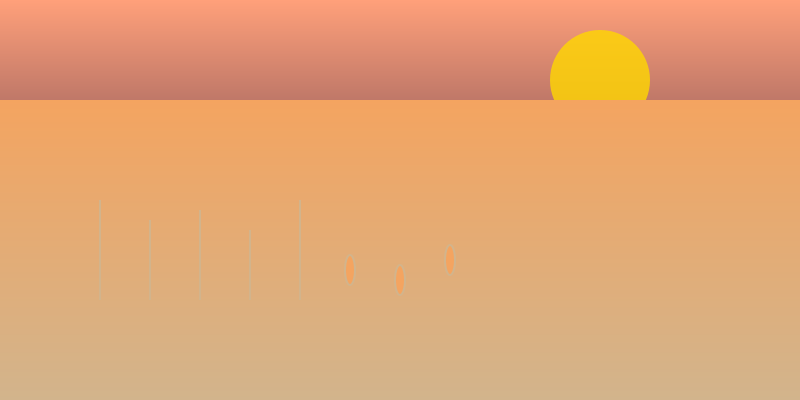

"'Golden wheat fields under a setting sun',"

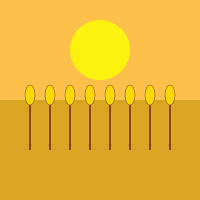

"'Golden wheat fields under a setting sun',"


CPU times: user 57.7 s, sys: 7.95 ms, total: 57.8 s
Wall time: 57.7 s


In [10]:
%%time

from IPython.display import SVG, display

def show_svg(svg_code: str, text: str = ""):
    display(SVG(svg_code))
    if text:
        display(text)
        
sys_prompt = """You are a SVG Image code generator and you only generate code without comments  and other messages, nothing else.

The descriptions are of common, generic subjects. No brand name or trademark or personal name occurs in any description. No people, even in generic form, occur in any description.
The subjects described span about a dozen categories. Three of these categories, landscapes, abstract, and fashion.
No description has more than 200 characters. The average length is around 50 characters.

Generate the code for provided description."""

def gen(idx, thinking_mode=False):

    prompt, original_svg_code = str(df_train['description'].loc[idx]),str(df_train['svg'].loc[idx])
    # prompt = str(prompt)
    # prepare the model input
    messages = [
        {"role": "system", "content": sys_prompt},
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True,
        enable_thinking=thinking_mode # Switches between thinking and non-thinking modes. Default is True.
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
    
    # conduct text completion
    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=32768
    )
    output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 
    
    # parsing thinking content
    try:
        # rindex finding 151668 ()
        index = len(output_ids) - output_ids[::-1].index(151668)
    except ValueError:
        index = 0
    
    thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
    content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")
    
    # print("thinking content:", thinking_content)
    print("Prompt: ",prompt)
    print("thinking content: \n",thinking_content)
    print("content: \n",content);print();print()
    
    show_svg(content,prompt); print()
    # show_svg(thinking_content, prompt);print()
    show_svg(original_svg_code, prompt); print()
    
    return content

r0 = gen(0,True)

# 8.2 s -> Not thinking
# 1min 11s -> With thinking

# Side by Side Comparison
### of model output with expected output

Prompt:  'Golden wheat fields under a setting sun',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 200" width="200" height="200" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="sunGradient" x1="0" y1="0" x2="1" y2="1">
      <stop offset="0%" stop-color="orange" />
      <stop offset="100%" stop-color="darkred" />
    </linearGradient>
  </defs>
  <rect width="200" height="200" fill="lightblue" />
  <circle cx="150" cy="50" r="30" fill="url(#sunGradient)" />
  <polygon points="0,150 50,100 100,150 150,100 200,150 200,200 100,200" fill="gold" />
</svg>




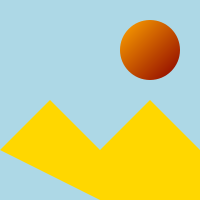

"'Golden wheat fields under a setting sun',"

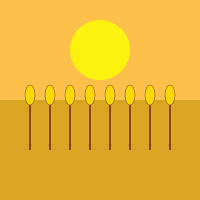

"'Golden wheat fields under a setting sun',"

In [11]:
r0_1 = gen(0,False)

Prompt:   'Snowy mountains under a clear blue sky',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 100" width="200" height="100" xmlns="http://www.w3.org/2000/svg">
  <rect x="0" y="0" width="200" height="100" fill="skyblue" />
  <polygon points="50,90 100,30 150,90" fill="white" stroke="gray" stroke-width="1" />
  <polygon points="70,90 120,40 170,90" fill="white" stroke="gray" stroke-width="1" />
  <polygon points="90,90 140,50 190,90" fill="white" stroke="gray" stroke-width="1" />
</svg>




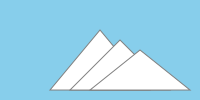

" 'Snowy mountains under a clear blue sky',"

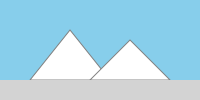

" 'Snowy mountains under a clear blue sky',"

In [12]:
r1 = gen(1)

Prompt:   'Checkerboard pattern with alternating green and black squares',
thinking content: 
 
content: 
 <svg viewBox="0 0 100 100" width="100" height="100" xmlns="http://www.w3.org/2000/svg">
  <rect x="0" y="0" width="50" height="50" fill="green"/>
  <rect x="50" y="0" width="50" height="50" fill="black"/>
  <rect x="0" y="50" width="50" height="50" fill="black"/>
  <rect x="50" y="50" width="50" height="50" fill="green"/>
</svg>




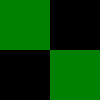

" 'Checkerboard pattern with alternating green and black squares',"

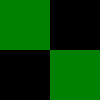

" 'Checkerboard pattern with alternating green and black squares',"

In [13]:
r2 = gen(2)

Prompt:   'A navy blue trench coat with brass buttons',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 300" width="200" height="300" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="trenchGradient" x1="0%" y1="0%" x2="0%" y2="100%">
      <stop offset="0%" stop-color="navy" />
      <stop offset="100%" stop-color="darkblue" />
    </linearGradient>
  </defs>
  <rect x="50" y="30" width="100" height="240" fill="url(#trenchGradient)" stroke="black" stroke-width="2" />
  <circle cx="100" cy="80" r="10" fill="gold" />
  <circle cx="100" cy="120" r="10" fill="gold" />
  <circle cx="100" cy="160" r="10" fill="gold" />
  <circle cx="100" cy="200" r="10" fill="gold" />
  <circle cx="100" cy="240" r="10" fill="gold" />
</svg>




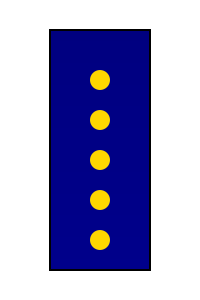

" 'A navy blue trench coat with brass buttons',"

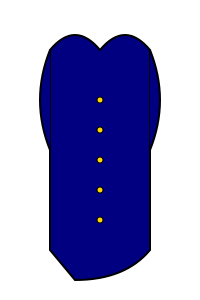

" 'A navy blue trench coat with brass buttons',"

In [14]:
r4 = gen(4)

Prompt:   'Sunset over a tranquil lake with pine trees',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 200" width="200" height="200" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="skyGradient" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="#FFCC66" />
      <stop offset="100%" stop-color="#FF6666" />
    </linearGradient>
    <linearGradient id="waterGradient" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="#FF9966" />
      <stop offset="100%" stop-color="#CC6666" />
    </linearGradient>
  </defs>
  <rect x="0" y="0" width="200" height="100" fill="url(#skyGradient)" />
  <rect x="0" y="100" width="200" height="100" fill="url(#waterGradient)" />
  <polygon points="0,100 50,80 100,100 150,80 200,100" fill="#225522" />
  <polygon points="0,120 50,100 100,120 150,100 200,120" fill="#113311" />
  <polygon points="0,140 50,120 100,140 150,120 200,140" fill="#002200" />
  <polyline points="30,150 40,160 50,150 60,160 70,150 80

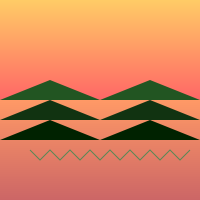

" 'Sunset over a tranquil lake with pine trees',"

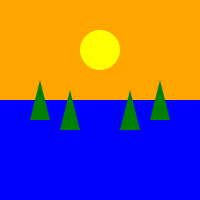

" 'Sunset over a tranquil lake with pine trees',"


Prompt:   'Rolling hills with patches of wildflowers',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 100" width="200" height="100" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="sky" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="#87CEEB" />
      <stop offset="100%" stop-color="#E0F7FA" />
    </linearGradient>
  </defs>
  <rect width="200" height="100" fill="url(#sky)" />
  <path d="M0,80 Q50,60 100,80 T200,80 L200,100 L0,100 Z" fill="#8BC34A" opacity="0.7" />
  <circle cx="30" cy="70" r="3" fill="#FFEB3B" />
  <circle cx="50" cy="75" r="2" fill="#FFEB3B" />
  <circle cx="70" cy="65" r="4" fill="#FFEB3B" />
  <circle cx="90" cy="70" r="3" fill="#FFEB3B" />
  <circle cx="110" cy="68" r="2" fill="#FFEB3B" />
  <circle cx="130" cy="72" r="3" fill="#FFEB3B" />
  <circle cx="150" cy="67" r="4" fill="#FFEB3B" />
  <circle cx="170" cy="70" r="2" fill="#FFEB3B" />
</svg>




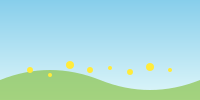

" 'Rolling hills with patches of wildflowers',"

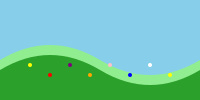

" 'Rolling hills with patches of wildflowers',"


Prompt:   'Golden desert dunes under a starry sky',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 200" width="200" height="200" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="skyGradient" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="#0a0a2a" />
      <stop offset="100%" stop-color="#1a1a4a" />
    </linearGradient>
    <radialGradient id="stars" cx="0.5" cy="0.5" r="0.5">
      <stop offset="0%" stop-color="#ffffff" stop-opacity="0.8" />
      <stop offset="100%" stop-color="#ffffff" stop-opacity="0" />
    </radialGradient>
  </defs>
  <rect x="0" y="0" width="200" height="100" fill="url(#skyGradient)" />
  <rect x="0" y="100" width="200" height="100" fill="#fcb040" />
  <circle cx="30" cy="20" r="2" fill="white" opacity="0.8" />
  <circle cx="70" cy="40" r="1.5" fill="white" opacity="0.8" />
  <circle cx="110" cy="15" r="2.5" fill="white" opacity="0.8" />
  <circle cx="150" cy="30" r="1" fill="white" opacity="0.8" />
  <circle cx="18

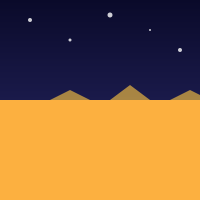

" 'Golden desert dunes under a starry sky',"

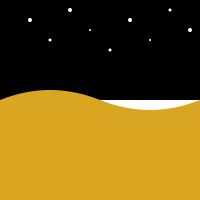

" 'Golden desert dunes under a starry sky',"


Prompt:   'Concentric circles in shades of gray and white',
thinking content: 
 
content: 
 <svg viewBox="0 0 100 100" width="200" height="200" xmlns="http://www.w3.org/2000/svg">
  <circle cx="50" cy="50" r="40" fill="none" stroke="gray" stroke-width="2"/>
  <circle cx="50" cy="50" r="30" fill="none" stroke="lightgray" stroke-width="2"/>
  <circle cx="50" cy="50" r="20" fill="none" stroke="darkgray" stroke-width="2"/>
  <circle cx="50" cy="50" r="10" fill="white" stroke="lightgray" stroke-width="1"/>
</svg>




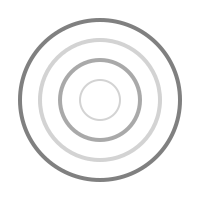

" 'Concentric circles in shades of gray and white',"

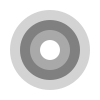

" 'Concentric circles in shades of gray and white',"


Prompt:   'Pastel-colored clouds over a calm ocean',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 100" width="200" height="100" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="skyGradient" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="#ffccf9" />
      <stop offset="100%" stop-color="#ccf2ff" />
    </linearGradient>
    <linearGradient id="oceanGradient" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="#a8e6ff" />
      <stop offset="100%" stop-color="#80d0f0" />
    </linearGradient>
  </defs>
  <rect x="0" y="0" width="200" height="50" fill="url(#skyGradient)" />
  <rect x="0" y="50" width="200" height="50" fill="url(#oceanGradient)" />
  <ellipse cx="50" cy="40" rx="30" ry="15" fill="#ff9a9e" opacity="0.8" />
  <ellipse cx="120" cy="35" rx="40" ry="20" fill="#a1c4fd" opacity="0.8" />
  <ellipse cx="150" cy="45" rx="25" ry="12" fill="#feca57" opacity="0.8" />
</svg>




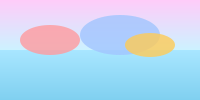

" 'Pastel-colored clouds over a calm ocean',"

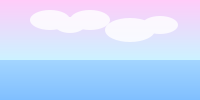

" 'Pastel-colored clouds over a calm ocean',"


Prompt:   'Crimson waves crashing against jagged rocks',
thinking content: 
 
content: 
 <svg viewBox="0 0 200 100" width="200" height="100" xmlns="http://www.w3.org/2000/svg">
  <defs>
    <linearGradient id="waveGradient" x1="0" y1="0" x2="0" y2="1">
      <stop offset="0%" stop-color="crimson" />
      <stop offset="100%" stop-color="darkred" />
    </linearGradient>
  </defs>
  <rect width="200" height="100" fill="lightblue" />
  <path d="M0,60 Q20,40 40,60 T80,60 T120,60 T160,60 T200,60 V100 H0 Z" fill="url(#waveGradient)" />
  <polygon points="60,80 80,60 100,80" fill="gray" />
  <polygon points="120,90 140,70 160,90" fill="gray" />
</svg>




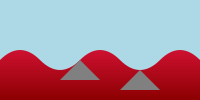

" 'Crimson waves crashing against jagged rocks',"

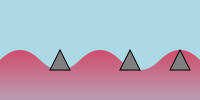

" 'Crimson waves crashing against jagged rocks',"

In [15]:
for i in range(5,11):
    r = gen(i)

Prompt:  a purple forest at dusk


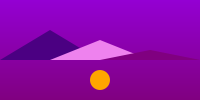

'a purple forest at dusk'


CPU times: user 18.5 s, sys: 6.35 ms, total: 18.5 s
Wall time: 18.4 s


In [19]:
%%time

def gen_2(idx, thinking_mode=False):

    prompt = str(original_train['description'].loc[idx])
    # prompt = str(prompt)
    # prepare the model input
    messages = [
        {"role": "system", "content": sys_prompt},
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True,
        enable_thinking=thinking_mode # Switches between thinking and non-thinking modes. Default is True.
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)
    
    # conduct text completion
    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=32768
    )
    output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 
    
    # parsing thinking content
    try:
        # rindex finding 151668 ()
        index = len(output_ids) - output_ids[::-1].index(151668)
    except ValueError:
        index = 0
    
    thinking_content = tokenizer.decode(output_ids[:index], skip_special_tokens=True).strip("\n")
    content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")
    
    # print("thinking content:", thinking_content)
    print("Prompt: ",prompt)
    # print("thinking content: \n",thinking_content)
    # print("content: \n",content);print();print()
    
    show_svg(content,prompt); print()
    # show_svg(thinking_content, prompt);print()
    # show_svg(original_svg_code, prompt); print()
    
    return content

p0 = gen_2(0,False)

# 8.2 s -> Not thinking
# 1min 11s -> With thinking

Prompt:  gray wool coat with a faux fur collar


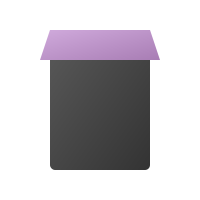

'gray wool coat with a faux fur collar'


Prompt:  a lighthouse overlooking the ocean


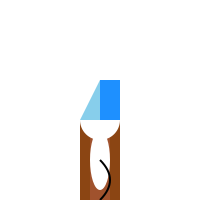

'a lighthouse overlooking the ocean'


Prompt:  burgundy corduroy pants with patch pockets and silver buttons


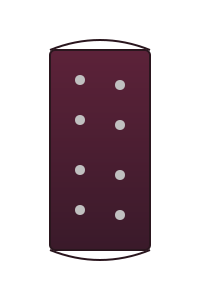

'burgundy corduroy pants with patch pockets and silver buttons'


Prompt:  orange corduroy overalls


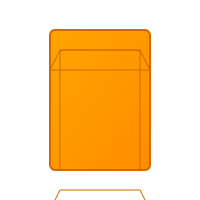

'orange corduroy overalls'


Prompt:  a purple silk scarf with tassel trim


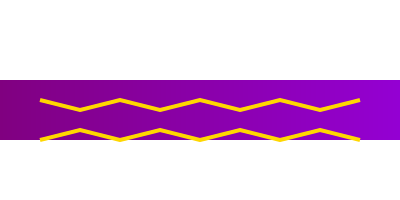

'a purple silk scarf with tassel trim'


Prompt:  a green lagoon under a cloudy sky


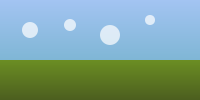

'a green lagoon under a cloudy sky'


Prompt:  crimson rectangles forming a chaotic grid


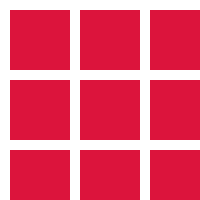

'crimson rectangles forming a chaotic grid'


Prompt:  purple pyramids spiraling around a bronze cone


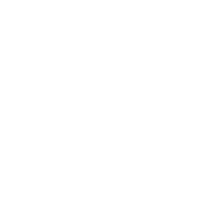

'purple pyramids spiraling around a bronze cone'


Prompt:  magenta trapezoids layered on a transluscent silver sheet


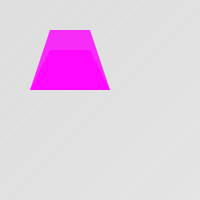

'magenta trapezoids layered on a transluscent silver sheet'


Prompt:  a snowy plain


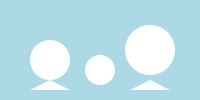

'a snowy plain'


Prompt:  black and white checkered pants


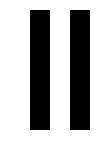

'black and white checkered pants'


Prompt:  a starlit night over snow-covered peaks


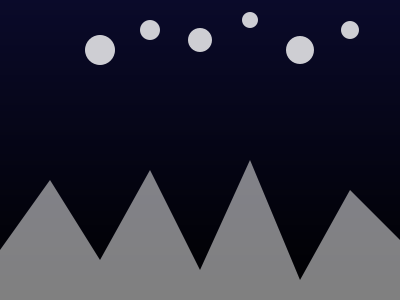

'a starlit night over snow-covered peaks'


Prompt:  khaki triangles and azure crescents


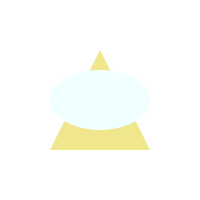

'khaki triangles and azure crescents'


Prompt:  a maroon dodecahedron interwoven with teal threads


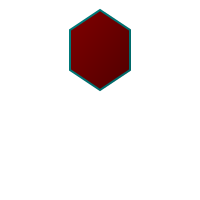

'a maroon dodecahedron interwoven with teal threads'

In [20]:
for i in range(1,15):
    r = gen_2(i)